In [1]:
# Report of the data mining activities

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
nodes_file_path = '/home/j.broeder/work/git/data_harvesting/examples/data_harvesting_fzj/openaire/datasets/tables/all_datasets_table.csv'
nodes_jsonfiles = '/home/j.broeder/work/git/data_harvesting/examples/data_harvesting_fzj/openaire/datasets/results_cct1/'
links_file_path = ''

In [4]:
import json
import os
import pandas as pd
from math import pi
from collections.abc import MutableMapping
import numpy as np
from wordcloud import WordCloud, STOPWORDS 
from bokeh.layouts import gridplot
from bokeh.io import output_file, show, output_notebook
from bokeh.plotting import figure as bokeh_figure
from bokeh.palettes import Category20c
from bokeh.plotting import show
from bokeh.transform import cumsum

In [5]:
output_notebook()

Loading BokehJS ...

In [6]:
# better to get from somewhere, for now helpers
def flatten_dict(d: MutableMapping, sep: str= '.') -> MutableMapping:
    """Flatten a given nested python dict and return a dict"""
    [flat_dict] = pd.json_normalize(d, sep=sep).to_dict(orient='records')
    return flat_dict

def bokeh_histogram_plot(hist, edges, x=None, pdf=None, cdf=None, title=None, xlabel='x', ylabel='y', figure=None):
    """Plot an interactiv bokeh histogram
    
    """
    if figure is None:
        tools='hover,pan,wheel_zoom,box_zoom,reset, save'
        pl = bokeh_figure(title=title, tools=tools)#, background_fill_color="#fafafa")
    else:
        pl = figure
    pl.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
           fill_color="navy", line_color="white", alpha=0.5)
    if pdf is not None and x is not None:
        pl.line(x, pdf, line_color="#ff8888", line_width=4, alpha=0.7, legend_label="PDF")
    if cdf is not None and x is not None:
        pl.line(x, cdf, line_color="orange", line_width=2, alpha=0.7, legend_label="CDF")

    pl.y_range.start = 0
    #pl.legend.location = "center_right"
    #pl.legend.background_fill_color = "#fefefe"
    pl.xaxis.axis_label = xlabel
    pl.yaxis.axis_label = ylabel
    pl.grid.grid_line_color="white"
    return pl

def plot_bokeh_pie_chart(x, title='', figure=None):
    """Draw a basic bokeh pie chart...."""
    data = pd.DataFrame.from_dict(
        dict(x), orient='index').reset_index().rename(index=str,
                                                      columns={
                                                          0: 'value',
                                                          'index': 'data_nodes'
                                                      })
    data['angle'] = data['value'] / sum(list(x.values())) * 2 * pi
    data['color'] = Category20c[len(x)]
    data['percent'] = data['value'] / sum(x.values())
    if figure is None:
        pl = bokeh_figure(plot_height=800,plot_width=600,
               title=title,
               toolbar_location=None,
               tools='hover',
               tooltips=[('Data', '@data_nodes'),
                         ('Percent', '@percent{0.00%}'), ('Count', '@value')])
    else:
        pl = figure
    pl.add_layout(Legend(), 'right')
    pl.wedge(x=0,
            y=1,
            radius=0.6,
            start_angle=cumsum('angle', include_zero=True),
            end_angle=cumsum('angle'),
            line_color='white',
            fill_color='color',
            legend_field='data_nodes',
            source=data)
    pl.axis.axis_label = None
    pl.axis.visible = False
    pl.grid.grid_line_color = None
    return pl

def plot_work_cloud(comment_words, facecolor='white', stopwords=None):
    """Plot a wordcloud
    
    :param comment_words: str of all words seperated by space, therefore multiple words should be joined...
    """


    wordcloud = WordCloud(width=1000, height=600, 
                background_color=facecolor, 
                stopwords=stopwords,
                min_font_size=10).generate(comment_words)
    plt.figure(figsize=(10,6), facecolor=facecolor) 
    plt.imshow(wordcloud) 
    plt.axis('off') 
    plt.tight_layout(pad=2)
    
def prepare_word_list(list_words, comment_words=["NaN", "nan"], split=False):
    """
    rekursive
    list_words list of strings, or nested list of strings
    """
    words_string = ""
    for val in list_words:
        if val in comment_words:
            continue
        if split:
            tokens = val.split()
            words_string += ' '.join(tokens) +' '
        else:
            new_val = val.strip()
            tokens = new_val.replace(" ", "_")# different replace
            tokens = tokens.replace("-", "_") # This separates the words...
            #tokens = tokens.replace(",", " ")
            words_string += ' ' + tokens +' '
        #print(tokens)
        #for i in range(len(tokens)): 
        #    tokens[i] = tokens[i].lower() 
        words_string = words_string.strip()
    return words_string

In [7]:
all_data = []
for filepath in os.listdir(nodes_jsonfiles):
    path = os.path.join(nodes_jsonfiles, filepath)
    with open(path, 'r', encoding='utf-8') as fileo:
        all_data.append(json.load(fileo))

In [8]:
all_keys = ['resourceName', 'resourceDescription', 'identifier', 'keyword', 'resourceStatus', 'date', 'author', 'dataType', 'contributor', 'publisher', 'geolocation', 'dataFormat', '_type', '_id', 'fairScore.version', 'fairScore.assessmentDate', 'fairScore.totalScore', 'fairScore.FScore', 'fairScore.AScore', 'fairScore.IScore', 'fairScore.RScore', 'size', 'accessRight.code', 'accessRight.label', 'accessRight.scheme']
all_data_dict = {}
to_remove = []
for i, data in enumerate(all_data):
    datat = flatten_dict(data)
    for key in to_remove:
        datat.pop(key)
    for key in all_keys:#datat.items():
        temp = all_data_dict.get(key, [])
        val = datat.get(key, None)
        temp.append(val)
        all_data_dict[key] = temp
    

print(list(all_data_dict.keys()))

['resourceName', 'resourceDescription', 'identifier', 'keyword', 'resourceStatus', 'date', 'author', 'dataType', 'contributor', 'publisher', 'geolocation', 'dataFormat', '_type', '_id', 'fairScore.version', 'fairScore.assessmentDate', 'fairScore.totalScore', 'fairScore.FScore', 'fairScore.AScore', 'fairScore.IScore', 'fairScore.RScore', 'size', 'accessRight.code', 'accessRight.label', 'accessRight.scheme']


In [9]:
for key, val in all_data_dict.items():
    print(len(val))

3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290
3290


In [10]:
df = pd.DataFrame.from_dict(all_data_dict)

In [11]:
df.describe()

_id  fairScore.totalScore  fairScore.FScore  \
count    3290.000000           3284.000000       3284.000000   
mean   302654.044377             43.026446         82.261787   
std       956.972797              4.855972          6.448984   
min    301000.000000             14.580000         35.710000   
25%    301824.250000             41.670000         85.710000   
50%    302654.500000             41.670000         85.710000   
75%    303482.750000             41.670000         85.710000   
max    304309.000000             91.670000        100.000000   

       fairScore.AScore  fairScore.IScore  fairScore.RScore  
count       3284.000000       3284.000000       3284.000000  
mean          33.913724         35.162911         21.431181  
std            5.046956         13.591197          7.030534  
min           33.330000          0.000000          0.000000  
25%           33.330000         25.000000         20.000000  
50%           33.330000         25.000000         20.000000  
75%           33.330000         50.000000         20.000000  
max          100.000000        100.000000         80.000000

In [12]:
df.keys()

Index(['resourceName', 'resourceDescription', 'identifier', 'keyword',
       'resourceStatus', 'date', 'author', 'dataType', 'contributor',
       'publisher', 'geolocation', 'dataFormat', '_type', '_id',
       'fairScore.version', 'fairScore.assessmentDate', 'fairScore.totalScore',
       'fairScore.FScore', 'fairScore.AScore', 'fairScore.IScore',
       'fairScore.RScore', 'size', 'accessRight.code', 'accessRight.label',
       'accessRight.scheme'],
      dtype='object')

In [13]:
# authors

for author in df.author:
    if author

SyntaxError: invalid syntax (63459420.py, line 4)

In [44]:
df.publisher.shape

(3290,)

In [58]:
publishers = df['publisher', 'fairScore.totalScore']

KeyError: ('publisher', 'fairScore.totalScore')

In [48]:
df.publisher.replace(rename_dict)

0       European Commission JRC Institute for Energy a...
1       European Commission JRC Institute for Energy a...
2                                             Jülich DATA
3       European Commission JRC Institute for Energy a...
4                                       GFZ Data Services
                              ...                        
3285    European Commission JRC Institute for Energy a...
3286                                          HEPData.net
3287                                          HEPData.net
3288                                               Zenodo
3289    European Commission JRC Institute for Energy a...
Name: publisher, Length: 3290, dtype: object

In [56]:
publishers = df.publisher.replace(rename_dict)
# merge same publishers, i.e figshare, Figshare, zenondo, HEP dat
#Beautify
rename_dict = {'e!DAL - Plant Genomics and Phenomics Research Data Repository (PGP), IPK Gatersleben, Seeland OT Gatersleben, Corrensstraße 3, 06466, Germany':  'e!DAL - Plant Genomics and Phenomics Research Data Repository (PGP)',
               'figshare': 'Figshare', 'ZENODO Research. Shared.' : 'Zenodo', 'HEPData' : 'HEPData.net'}
#publishers = publishers.rename(rename_dict, axis=0).value_counts()
publishers_n = publishers.value_counts()


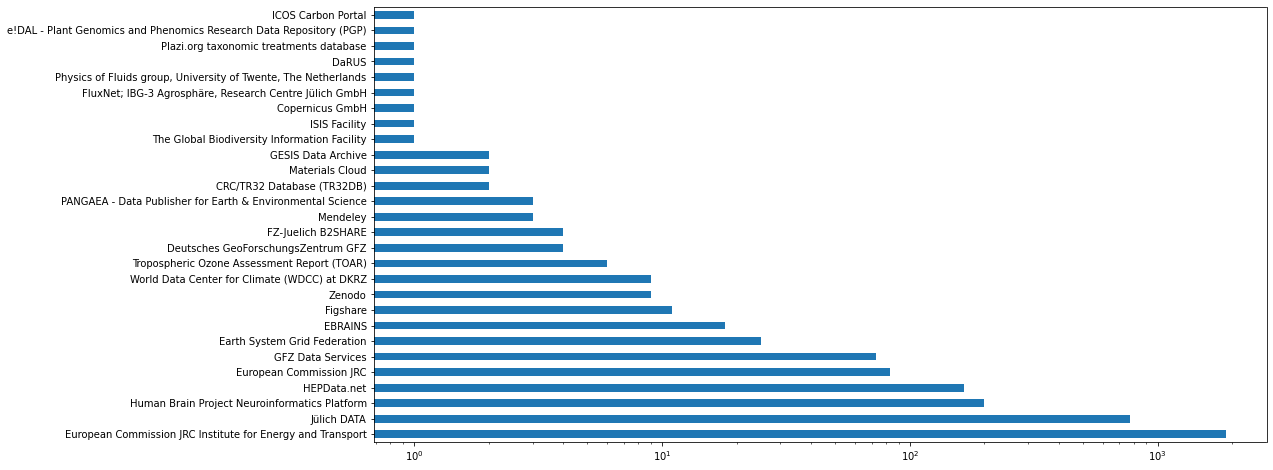

In [57]:
p_plot = publishers_n.plot(kind='barh', figsize=(16,8), logx=True)

In [ ]:
a = dict(df.publisher.value_counts())

In [ ]:
a

In [ ]:
plot_bokeh_pie_chart(a)

In [ ]:
a

In [ ]:
df.publisher.count

In [ ]:
# keywords
df.keyword

In [ ]:
# plot all fair scores
# plot pie charts, histos,
# knowledge graph
# weight repos by number of people

In [ ]:
#import csv
#with open(nodes_file_path, 'r', as, newline='') as csvfile:
#    spamreader = csv.reader(csvfile, delimiter=' ')#, quotechar='|')
#    for row in spamreader:
#        data.append(row)